# How many PCs are really necessary?

## Setup

In [1]:
import os

import xarray as xr

from gemmr.data.loaders import load_other_outcomes

import holoviews as hv
from holoviews import opts
hv.extension('matplotlib')
hv.renderer('matplotlib').param.set_param(dpi=120)

from my_config import *

import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.simplefilter('ignore', MatplotlibDeprecationWarning)
warnings.filterwarnings(
    'ignore', 'aspect is not supported for Axes with xscale=log, yscale=linear', category=UserWarning
)  # holoviews emits this for log-linear plots

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Prepare data

The following takes a while to run:

```
import os
import numpy as np
import xarray as xr
from sklearn.model_selection import cross_val_score
from tqdm import trange
from gemmr.estimators import SVDCCA
from gemmr.estimators.helpers import pearson_transform_scorer

_ds = xr.open_dataset(
    os.path.expanduser('~/gemmr_data/empirical/ukb_fmri_smithpreproc_pcs.nc')
)
ukbb_fMRI_X, ukbb_fMRI_Y = _ds['X_pcs'].values, _ds['Y_pcs'].values

cca_rs = np.nan * np.empty((100, 100))
cca_rs_cv = np.nan * np.empty((100, 100))
cca = SVDCCA()
for i in trange(1, 100):
    for j in trange(1, 100, leave=False):
        cca_rs[i,j] = cca.fit(ukbb_fMRI_X[:, :i], ukbb_fMRI_Y[:, :j]).assocs_[0]
        cca_rs_cv[i, j] = cross_val_score(
            cca, ukbb_fMRI_X[:, :i], ukbb_fMRI_Y[:, :j], cv=5, 
            scoring=pearson_transform_scorer, n_jobs=None
        ).mean()

ds = xr.Dataset(dict(
    cca_rs=xr.DataArray(cca_rs, dims=('n_X_pcs', 'n_Y_pcs')),
    cca_rs_cv=xr.DataArray(cca_rs_cv, dims=('n_X_pcs', 'n_Y_pcs'))
))
ds.to_netcdf('ukb_how_many_pcs_cca_inSampleCV.nc')
```

```
import os
import numpy as np
import xarray as xr
from sklearn.model_selection import cross_val_score
from tqdm import trange
from gemmr.estimators import SVDPLS
from gemmr.estimators.helpers import cov_transform_scorer

_ds = xr.open_dataset(
    os.path.expanduser('~/gemmr_data/empirical/ukb_fmri_smithpreproc_pcs.nc')
)
ukbb_fMRI_X, ukbb_fMRI_Y = _ds['X_pcs'].values, _ds['Y_pcs'].values

pls_covs = np.nan * np.empty((100, 100))
pls_covs_cv = np.nan * np.empty((100, 100))
pls = SVDPLS()
for i in trange(1, 100):
    for j in trange(1, 100, leave=False):
        pls_covs[i,j] = pls.fit(ukbb_fMRI_X[:, :i], ukbb_fMRI_Y[:, :j]).assocs_[0]
        pls_covs_cv[i, j] = cross_val_score(
            pls, ukbb_fMRI_X[:, :i], ukbb_fMRI_Y[:, :j], cv=5, 
            scoring=cov_transform_scorer, n_jobs=None
        ).mean()

ds = xr.Dataset(dict(
    pls_covs=xr.DataArray(pls_covs, dims=('n_X_pcs', 'n_Y_pcs')),
    pls_covs_cv=xr.DataArray(pls_covs_cv, dims=('n_X_pcs', 'n_Y_pcs'))
))
ds.to_netcdf('ukb_how_many_pcs_pls_inSampleCV.nc')
```

The previous code segments store their outputs in files for later usage. Now load these previously generated data:

In [2]:
ds_cca = xr.load_dataset('ukb_how_many_pcs_cca_inSampleCV.nc')
ds_pls = xr.load_dataset('ukb_how_many_pcs_pls_inSampleCV.nc')

In [3]:
cca_rs, cca_rs_cv = ds_cca.cca_rs.values, ds_cca.cca_rs_cv.values
pls_covs, pls_covs_cv = ds_pls.pls_covs.values, ds_pls.pls_covs_cv.values

## Results

:Layout
   .Raster.CCA                                                                 :Raster   [# top behav. PCs retained,# top neuroim. PCs retained]   (z)
   .Raster.CCA_left_parenthesis_cross_hyphen_minus_validated_right_parenthesis :Raster   [# top behav. PCs retained,# top neuroim. PCs retained]   (z)
   .Raster.PLS                                                                 :Raster   [# top behav. PCs retained,# top neuroim. PCs retained]   (z)
   .Raster.PLS_left_parenthesis_cross_hyphen_minus_validated_right_parenthesis :Raster   [# top behav. PCs retained,# top neuroim. PCs retained]   (z)
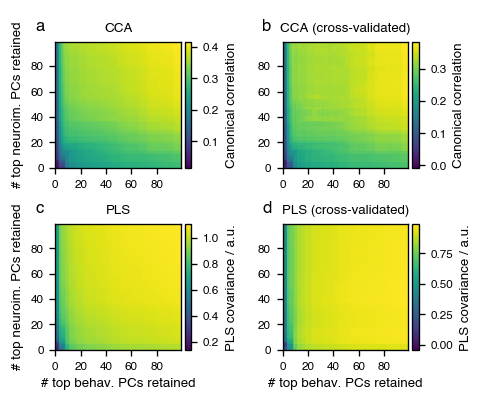

In [8]:
fig = (
    hv.Raster(cca_rs[1:, 1:]).relabel('CCA').opts(clabel='Canonical correlation', xlabel='')
    + hv.Raster(cca_rs_cv[1:, 1:]).relabel('CCA (cross-validated)').opts(clabel='Canonical correlation', xlabel='', ylabel='')
    + hv.Raster(pls_covs[1:, 1:] / 3500).relabel('PLS').opts(clabel='PLS covariance / a.u.')
    + hv.Raster(pls_covs_cv[1:, 1:] / 3500).relabel('PLS (cross-validated)').opts(clabel='PLS covariance / a.u.', ylabel='')
).redim(
    x='# top behav. PCs retained',
    y='# top neuroim. PCs retained'
).cols(
    2
).opts(*fig_opts).opts(
    opts.Raster(colorbar=True, cmap='viridis', xticks=[0, 20, 40, 60, 80], invert_yaxis=True),
    opts.Layout(hspace=.6, vspace=.45, sublabel_position=(-.28, .95))
)

hv.save(fig, "fig/figS_cca_pls_assocStrength_dependingOnNRetainedPCs.pdf")

fig